# 1. Chuẩn bị thư viện và dữ liệu

In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM


In [2]:
df = pd.read_csv('BTC_Dataset.csv')
df['ClosingPrice'] = df['Closing Price (USD)']/10000
df.pop('Currency')
df.pop('24h Open (USD)')
df.pop('24h High (USD)')
df.pop('24h Low (USD)')
df.pop('Closing Price (USD)')
df

,Date,ClosingPrice
0,2020-06-01,0.942767
1,2020-06-02,1.026858
2,2020-06-03,0.951614
3,2020-06-04,0.966706
4,2020-06-05,0.981137
...,...,...
381,2021-06-17,3.855748
382,2021-06-18,3.772202
383,2021-06-19,3.552045
384,2021-06-20,3.565630


**Vẽ sơ đồ minh họa**

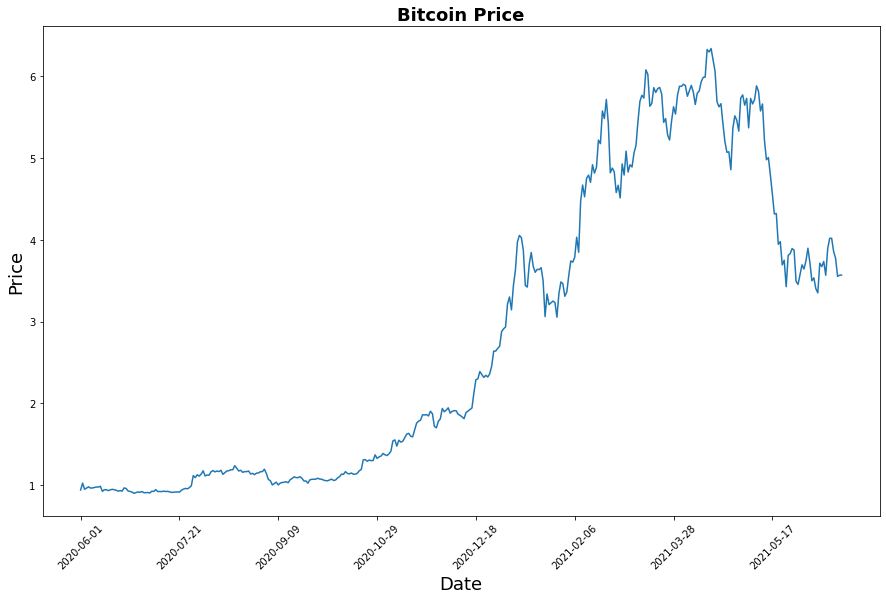

In [3]:
price = df[['ClosingPrice']]

plt.figure(figsize = (15,9))
plt.plot(price)
plt.xticks(range(0, df.shape[0],50), df['Date'].loc[::50],rotation=45)
plt.title("Bitcoin Price",fontsize=18, fontweight='bold')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price',fontsize=18)
plt.show()

# 2. Tiền xử lý và Chia train/test

In [4]:
price = np.array(price)
price

array([[0.94276701],
       [1.0268582 ],
       [0.95161354],
       [0.96670608],
       [0.98113671],
       [0.96596613],
       [0.9677051 ],
       [0.97374586],
       [0.97919279],
       [0.9786142 ],
       [0.9874967 ],
       [0.92608326],
       [0.94642281],
       [0.94586598],
       [0.93519537],
       [0.9441769 ],
       [0.95106606],
       [0.94576271],
       [0.93986421],
       [0.92797608],
       [0.93530782],
       [0.92891045],
       [0.96809471],
       [0.96096802],
       [0.93111363],
       [0.92526334],
       [0.91717321],
       [0.90221538],
       [0.91018501],
       [0.91880614],
       [0.91484449],
       [0.92363168],
       [0.90977974],
       [0.90943246],
       [0.91246535],
       [0.90554645],
       [0.92788056],
       [0.92444158],
       [0.947176  ],
       [0.92361433],
       [0.92431753],
       [0.92298598],
       [0.9286737 ],
       [0.92389938],
       [0.9260471 ],
       [0.92110264],
       [0.91337778],
       [0.916

In [5]:
train_size = int(len(df) * 0.80)
test_size = len(df) - train_size

In [6]:
train, test = price[0:train_size,:], price[train_size:len(df),:]
print(len(train), len(test))

308 78


In [7]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [8]:
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(304, 3)
(304,)
(74, 3)
(74,)


In [9]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
trainX = trainX.reshape((trainX.shape[0], trainX.shape[1], n_features))
trainX.shape
testX = testX.reshape((testX.shape[0], testX.shape[1], n_features))
testX.shape

(74, 3, 1)

# 3. Building Model

In [10]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(look_back, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(trainX, trainY, epochs=300, verbose=1)

Epoch 1/300
10/10 [==============================] - 3s 3ms/step - loss: 7.5196
Epoch 2/300
10/10 [==============================] - 0s 3ms/step - loss: 7.4308
Epoch 3/300
10/10 [==============================] - 0s 3ms/step - loss: 6.0804
Epoch 4/300
10/10 [==============================] - 0s 3ms/step - loss: 3.2402
Epoch 5/300
10/10 [==============================] - 0s 3ms/step - loss: 0.8911
Epoch 6/300
10/10 [==============================] - 0s 1ms/step - loss: 0.6232
Epoch 7/300
10/10 [==============================] - 0s 3ms/step - loss: 0.6398
Epoch 8/300
10/10 [==============================] - 0s 3ms/step - loss: 0.5003
Epoch 9/300
10/10 [==============================] - 0s 3ms/step - loss: 0.3660
Epoch 10/300
10/10 [==============================] - 0s 3ms/step - loss: 0.3099
Epoch 11/300
10/10 [==============================] - 0s 3ms/step - loss: 0.2551
Epoch 12/300
10/10 [==============================] - 0s 3ms/step - loss: 0.2225
Epoch 13/300
10/10 [=================

10/10 [==============================] - 0s 4ms/step - loss: 0.0204
Epoch 103/300
10/10 [==============================] - 0s 5ms/step - loss: 0.0217
Epoch 104/300
10/10 [==============================] - 0s 17ms/step - loss: 0.0264
Epoch 105/300
10/10 [==============================] - 0s 3ms/step - loss: 0.0222
Epoch 106/300
10/10 [==============================] - 0s 3ms/step - loss: 0.0252
Epoch 107/300
10/10 [==============================] - 0s 3ms/step - loss: 0.0271
Epoch 108/300
10/10 [==============================] - 0s 3ms/step - loss: 0.0226
Epoch 109/300
10/10 [==============================] - 0s 3ms/step - loss: 0.0212
Epoch 110/300
10/10 [==============================] - 0s 3ms/step - loss: 0.0261
Epoch 111/300
10/10 [==============================] - 0s 3ms/step - loss: 0.0267
Epoch 112/300
10/10 [==============================] - 0s 3ms/step - loss: 0.0200
Epoch 113/300
10/10 [==============================] - 0s 3ms/step - loss: 0.0202
Epoch 114/300
10/10 [========

10/10 [==============================] - 0s 4ms/step - loss: 0.0172
Epoch 203/300
10/10 [==============================] - 0s 3ms/step - loss: 0.0177
Epoch 204/300
10/10 [==============================] - 0s 4ms/step - loss: 0.0158
Epoch 205/300
10/10 [==============================] - 0s 3ms/step - loss: 0.0180
Epoch 206/300
10/10 [==============================] - 0s 3ms/step - loss: 0.0166
Epoch 207/300
10/10 [==============================] - 0s 3ms/step - loss: 0.0155
Epoch 208/300
10/10 [==============================] - 0s 3ms/step - loss: 0.0193
Epoch 209/300
10/10 [==============================] - 0s 3ms/step - loss: 0.0143
Epoch 210/300
10/10 [==============================] - 0s 3ms/step - loss: 0.0160
Epoch 211/300
10/10 [==============================] - 0s 5ms/step - loss: 0.0157
Epoch 212/300
10/10 [==============================] - 0s 4ms/step - loss: 0.0151
Epoch 213/300
10/10 [==============================] - 0s 4ms/step - loss: 0.0185
Epoch 214/300
10/10 [=========

In [11]:
LSTM_predict= model.predict(testX)
LSTM_predict.reshape(-1,1)

array([[5.83155  ],
       [5.68619  ],
       [5.832342 ],
       [5.8576503],
       [5.959767 ],
       [6.0018473],
       [5.9949613],
       [6.276031 ],
       [6.263724 ],
       [6.2823315],
       [6.1455455],
       [6.020123 ],
       [5.683027 ],
       [5.6589017],
       [5.7149825],
       [5.4780974],
       [5.282931 ],
       [5.172751 ],
       [5.181376 ],
       [4.9749103],
       [5.450024 ],
       [5.5835133],
       [5.533521 ],
       [5.406463 ],
       [5.8022084],
       [5.821895 ],
       [5.6870666],
       [5.7735157],
       [5.427686 ],
       [5.7904544],
       [5.7152452],
       [5.7597165],
       [5.922296 ],
       [5.842626 ],
       [5.6098423],
       [5.710382 ],
       [5.2903037],
       [5.085222 ],
       [5.1176486],
       [4.9131393],
       [4.706779 ],
       [4.4765553],
       [4.4626136],
       [4.11759  ],
       [4.1290236],
       [3.8548553],
       [3.8868196],
       [3.5948057],
       [3.8835158],
       [3.8870976],


In [13]:
testY = testY.reshape(-1,1)
testY.shape

(74, 1)

In [14]:
date = pd.to_datetime(df.Date).astype(np.int64)

In [15]:
date = date[(len(date)-len(testY)):]
date

312    1617926400000000000
313    1618012800000000000
314    1618099200000000000
315    1618185600000000000
316    1618272000000000000
              ...         
381    1623888000000000000
382    1623974400000000000
383    1624060800000000000
384    1624147200000000000
385    1624233600000000000
Name: Date, Length: 74, dtype: int64

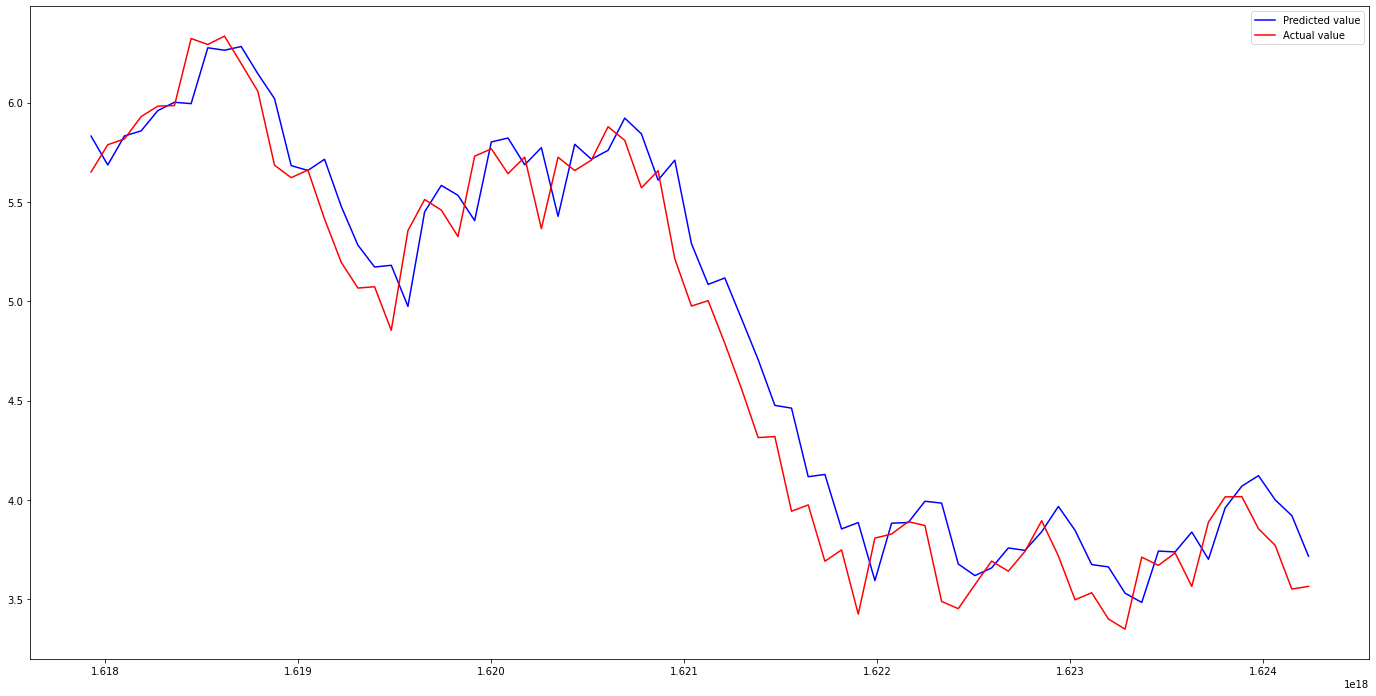

In [16]:
fig= plt.figure(figsize=(24,12))
plt.plot(date,LSTM_predict,color='blue', label='Predicted value')
plt.plot(date,testY,color='red', label='Actual value')
plt.legend()
plt.show()

# 4. Đánh Giá mô hình

In [17]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [19]:
#MAPE
mean_absolute_percentage_error(testY, LSTM_predict)

4.178589347401754

In [21]:
#RMSE
import math
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(testY, LSTM_predict)
RMSE = math.sqrt(MSE)
print(RMSE)

0.23116966938996103
